#  Project: Wrangle And Analyze Data <a name="top"></a> 

## Table of Contents

* [Introduction](#introduction)
* [Gather](#gather)
* [Access](#access)
* [Clean](#clean)
* [Insights & Visuals](#insights)
* [Conclusion](#conclusion)


## Introduction <a name="introduction"></a>
The objective of this project is to showcase ability in wrangling data from different sources.
To achieve this, data will be gathered from Twitter's API, specifically from an account, [WeRateDogs](https://twitter.com/dog_rates) that rates people's dogs with humorous reviews. You can read more about 
the account on this wikipedia entry [here](https://en.wikipedia.org/wiki/WeRateDogs).
The project will be divided into three main categories: *Gathering, Acessing and Cleaning*, then finally some conclusions will be drawn from all the data.

To begin, we list all the libraries and tools that we will use:

In [1]:
# Libraries 
import pandas as pd
import numpy as np
import json
import tweepy
import time
import warnings
import requests
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import os

## Gather <a name="gather"></a>

In [532]:
# Open csv files in dataframe and assign it the name twitter_archive
twitter_archive = pd.read_csv(r'C:\\Users\jonathan\DataScienceProjects\Wrangle And Analyze\twitter-archive-enhanced.csv')
# View the first 5 rows
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [533]:
# View the last 5 rows
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [534]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
# download image-predictions tsv file using request library
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
# save the file to a pandas dataframe as image_predictions    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [535]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [536]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [537]:
# View more information about the dataset, number of columns, datatypes, count                           
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
# code to pull in data from Twitter via tweepy. keys and tokens have been replaced
auth = tweepy.OAuthHandler(API KEY, API KEY SECRET)
auth.set_access_token(ACCESS TOKEN,ACCESS TOKEN SECRET)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)


In [10]:
# For loop to run through the data
tweets_list = []
# Tweets that can't be found are saved in the list below:
missing_tweets = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        tweets_list.append(api.get_status(tweet_id))
    except Exception as e:
        missing_tweets.append(tweet_id)

Rate limit reached. Sleeping for: 176
Rate limit reached. Sleeping for: 198


In [11]:
print("The number of tweets found are " ,len(tweets_list))
print("Missing tweets are" , len(missing_tweets))

The number of tweets found are  2331
Missing tweets are 25


In [12]:
# looping through the data and appending to a list
data_source = []
for each_tweet in tweets_list:
    data_source.append(each_tweet)

In [13]:
# Creating a json file to receive the data
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(data_source, indent=4))

In [14]:
# Adding the data to the json file
prep_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        prep_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(prep_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])


In [538]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35705,7548,8855814,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30873,5593,8855814,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23208,3704,8855814,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39002,7731,8855814,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37255,8332,8855814,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [539]:
tweet_json.tail()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2326,666049248165822465,96,40,8855848,17,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,266,126,8855848,17,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,111,39,8855848,17,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,120,41,8855848,17,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI
2330,666020888022790149,2380,456,8855848,17,Twitter for iPhone,Original tweet,https://t.co/BLDqew2Ijj


In [540]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


Now that all the data has been successfully gathered, it is time to access the data. 
This will be done both **visually** and **programmatically**

## Assess <a name="access"></a>

The 3 files we have gathered, **twitter-archive, image-predictions** and **tweet-json** will be assessed under this section

### Visual Assessment

In [18]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [19]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35705,7548,8855814,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30873,5593,8855814,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23208,3704,8855814,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39002,7731,8855814,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37255,8332,8855814,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...
2326,666049248165822465,96,40,8855848,17,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,266,126,8855848,17,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,111,39,8855848,17,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,120,41,8855848,17,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


### Programmatic Assessment

### twitter-archive

In [451]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [22]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [452]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [453]:
# check for null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [454]:
# Get count of unique values
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [455]:
# check if tweet_id columns has duplicate values
twitter_archive['tweet_id'].duplicated().any()

False

In [456]:
# check the values in name column
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
            ... 
Mya            1
Jeffri         1
Bilbo          1
Eriq           1
Charleson      1
Name: name, Length: 957, dtype: int64

In [457]:
# list the columns in the dataset
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [29]:
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2246,667878741721415682,NaN,NaN,2015-11-21 01:34:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,None,None,None,None


In [458]:
# checking the unique values of doggo, floofer, pupper and puppo column
twitter_archive['doggo'].unique(), twitter_archive['floofer'].unique(), 
twitter_archive['pupper'].unique(), twitter_archive['puppo'].unique()

(array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [31]:
# Check where the dog stages appear as None
twitter_archive.loc[(twitter_archive['doggo']== 'None') & (twitter_archive['floofer']== 'None') & (twitter_archive['pupper']== 'None') & (twitter_archive['puppo']== 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [32]:
twitter_archive.loc[(twitter_archive['doggo']== 'doggo') & (twitter_archive['pupper']== 'pupper')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [33]:
twitter_archive.loc[(twitter_archive['doggo']== 'doggo') & (twitter_archive['floofer']== 'floofer')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [34]:
twitter_archive.loc[(twitter_archive['doggo']== 'doggo') & (twitter_archive['puppo']== 'puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [35]:
len(twitter_archive.loc[(twitter_archive['floofer']== 'floofer') & (twitter_archive['pupper']== 'pupper')])

0

In [36]:
len(twitter_archive.loc[(twitter_archive['floofer']== 'floofer') & (twitter_archive['puppo']== 'puppo')])

0

In [37]:
len(twitter_archive.loc[(twitter_archive['pupper']== 'pupper') & (twitter_archive['puppo']== 'puppo')])

0

In [38]:
# Use regex to check for ratings that use decimal numbers
twitter_archive[twitter_archive['text'].str.contains(r'(\d+\.\d+\/\d+)')]

C:\Users\jonathan\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [39]:
# get unique values of rating_numerator column
np.sort(twitter_archive['rating_numerator'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776], dtype=int64)

In [40]:
# get unique values of rating_denominator column
np.sort(twitter_archive['rating_denominator'].unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170], dtype=int64)

In [41]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [42]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### image_predictions

In [459]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [460]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [461]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [462]:
# generate random rows by 10
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1833,836753516572119041,https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg,1,mortarboard,0.936882,False,academic_gown,0.020815,False,schipperke,0.011564,True
1371,762316489655476224,https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg,1,African_grey,0.270468,False,Madagascar_cat,0.076187,False,television,0.033306,False
1499,783821107061198850,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,1,Lakeland_terrier,0.265659,True,golden_retriever,0.196414,True,standard_poodle,0.133534,True
594,679503373272485890,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,1,porcupine,0.999846,False,meerkat,0.000072,False,echidna,0.000044,False
672,683142553609318400,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True
1676,813172488309972993,https://pbs.twimg.com/media/C0j4EESUsAABtMq.jpg,1,doormat,0.954844,False,golden_retriever,0.026193,True,cocker_spaniel,0.004386,True
979,707297311098011648,https://pbs.twimg.com/media/CdDTJLMW4AEST--.jpg,1,Blenheim_spaniel,0.370717,True,Shih-Tzu,0.201566,True,black-footed_ferret,0.101559,False
1126,727524757080539137,https://pbs.twimg.com/media/Chiv6BAW4AAiQvH.jpg,2,Pomeranian,0.958834,True,Chihuahua,0.024099,True,chow,0.003941,True
1567,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
714,685532292383666176,https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg,1,white_wolf,0.318524,False,dingo,0.215436,False,collie,0.095805,True


In [463]:
# check for count of null values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [464]:
# check for duplicates
image_predictions['tweet_id'].duplicated().any()

False

In [465]:
# check for duplicates
image_predictions['jpg_url'].duplicated().any()

True

In [466]:
# get the count of duplicates
sum(image_predictions.jpg_url.duplicated())

66

In [51]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [52]:
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [53]:
image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [54]:
image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### tweet_json

In [467]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35705,7548,8855814,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30873,5593,8855814,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23208,3704,8855814,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39002,7731,8855814,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37255,8332,8855814,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [468]:
tweet_json.tail()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2326,666049248165822465,96,40,8855848,17,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,266,126,8855848,17,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,111,39,8855848,17,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,120,41,8855848,17,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI
2330,666020888022790149,2380,456,8855848,17,Twitter for iPhone,Original tweet,https://t.co/BLDqew2Ijj


In [469]:
tweet_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2331.000000,2331.000000,2.331000e+03,2331.0
mean,7460.217074,2653.736165,8.855836e+06,17.0
std,11582.784299,4488.314209,5.935984e+01,0.0
min,0.000000,1.000000,8.855814e+06,17.0
25%,1297.500000,537.000000,8.855824e+06,17.0
50%,3243.000000,1242.000000,8.855830e+06,17.0
75%,9139.000000,3082.000000,8.855833e+06,17.0
max,153932.000000,76271.000000,8.856492e+06,17.0


In [470]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1944,673317986296586240,837,238,8855844,17,Twitter for iPhone,Original tweet,https://t.co/juX48bWpng
166,858471635011153920,20517,4549,8855818,17,Twitter for iPhone,Original tweet,https://t.co/8jOC4zhNxy
472,813944609378369540,0,3190,8855823,17,Twitter for iPhone,This is a retweet,This is a retweet
119,868639477480148993,0,1890,8855816,17,Twitter for iPhone,This is a retweet,This is a retweet
1218,711998809858043904,0,125,8855830,17,Twitter for iPhone,This is a retweet,This is a retweet
224,847842811428974592,5312,1283,8855819,17,Twitter for iPhone,Original tweet,https://t.co/YrKQoI5Dde
1165,718246886998687744,1867,484,8855831,17,Twitter for iPhone,Original tweet,https://t.co/FmxOpf2Sgl
1924,673689733134946305,1658,609,8855843,17,Twitter for iPhone,Original tweet,https://t.co/YPsJasNVGe
648,790581949425475584,20783,7168,8855826,17,Twitter for iPhone,Original tweet,https://t.co/Fd5WFDTMH4
1513,689877686181715968,2991,1138,8855832,17,Twitter for iPhone,Original tweet,https://t.co/5iH08ltkoe


In [471]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [472]:
tweet_json.isnull().any()

tweet_id            False
favorite_count      False
retweet_count       False
followers_count     False
friends_count       False
source              False
retweeted_status    False
url                 False
dtype: bool

In [473]:
tweet_json['tweet_id'].duplicated().any()

False

##  Issues (quality and tidiness)


### Quality Issues

#### twitter_archive
1. Some columns are not needed, so they can be safely droppped. These columns mostly have to 
do with 'retweets' ( Only original tweets are needed for this assessment),'replies' and some others
2. Incomplete and missing information in puppo, pupper, floofer and doggo columns
3. Timestamp not in proper datetime format
4. In name column, 'none' appears 745 times, also false names such as 'a' and 'o'
5. Some ratings are wrong due to improper 'rating_numerator' and 'rating_denominator'


#### image_predictions
6. Duplicate data in 'jpg_url' should be dropped
7.  False data in p1, p2 and p3 columns eg paper_towel and orange (We only want dogs)


#### tweet_json
8. tweet_id is of type object, will be converted to int, to match with dtype of twitter_archive and image_predictions tweet_id


### Tidiness
1. puppo, pupper, floofer, doggo can all be merged into dog_stage
2. Convert dtype of puppo, pupper, floofer and doggo to 'category'(after collapsing them into a single column)
3. Columns not needed will be dropped
4. The 3 datasets will be merged into 1


## Clean <a name="clean"></a>
Before perfoming any cleaning operations on our dataset, it is best practice to make copies:

In [866]:
clean_archive = twitter_archive.copy()

In [867]:
clean_image = image_predictions.copy()

In [868]:
clean_json = tweet_json.copy()

In [796]:
clean_archive.to_csv('clean_archive.csv', encoding = 'utf-8')

In [797]:
clean_image.to_csv('clean_image.csv', encoding = 'utf-8')

In [798]:
clean_json.to_csv('clean_json.csv', encoding = 'utf-8')

In [869]:
# Check to ensure clean_archive was copied correctly: 
clean_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [870]:
# Check to ensure clean_image was copied correctly:
clean_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [871]:
# Check to ensure clean_json was copied correctly:
clean_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35705,7548,8855814,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30873,5593,8855814,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23208,3704,8855814,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39002,7731,8855814,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37255,8332,8855814,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...
2326,666049248165822465,96,40,8855848,17,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,266,126,8855848,17,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,111,39,8855848,17,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,120,41,8855848,17,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


#### clean_archive cleaning

#### 1. Remove columns having to do with retweets and replies, etc

In [872]:
list(clean_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

 We need to check the values in the retweeted_status_id column. If there are values present, then it's a retweet, 
 otherwise it's an original. These have to be taken care of first before we can safely drop the columns associated
 with retweets. If not done, then there will still be rows present with retweets, even after the columns have
 been dropped.
 (Thanks to my mentor for pointing it out and outlining the steps I need to take)


In [873]:
clean_archive['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [874]:
sum(clean_archive['retweeted_status_id'].isnull())


2175

In [875]:
# drop the rows with values, as these are retweets. keep the rows without values.
clean_archive = clean_archive[clean_archive['retweeted_status_id'].isnull()]

In [876]:
# check
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [877]:
# We can now delete the columns 
clean_archive = clean_archive.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'source',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id',                                 
                                    'retweeted_status_timestamp', 
                                    'expanded_urls'], 1)

In [878]:
# check to see the columns were successfully dropped
list(clean_archive)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

(The next few cells will combine 2 issues; **cleaning** the four dog stages, by concatenating them, combining them into a single column, 'dog_stage_, then **tidying** the dataset by deleting the four columns. Then deleting the multiple entries by dropping the duplicate tweet_ids )
#### (Tidiness) 1. Combine puppo, pupper, floofer and doggo into dog_stage

#### (Cleaning)  2. Incomplete and missing information in puppo, doggo, pupper and floofer

In [879]:
#Some of the dog stages have multiple entries. These rows will be concatenated

clean_archive.loc[clean_archive.doggo == 'None', 'doggo'] = ''
clean_archive.loc[clean_archive.floofer == 'None', 'floofer'] = ''
clean_archive.loc[clean_archive.pupper == 'None', 'pupper'] = ''
clean_archive.loc[clean_archive.puppo == 'None', 'puppo'] = ''

clean_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1831
1,,,,puppo,24
2,,,pupper,,224
3,,floofer,,,9
4,doggo,,,,75
5,doggo,,,puppo,1
6,doggo,,pupper,,10
7,doggo,floofer,,,1


In [880]:
# some stages have double entries, starting with doggo.
# treat the doggo entry as an error, and assign the the second value to the column 

clean_archive['dog_stage'] = clean_archive.doggo + clean_archive.floofer + clean_archive.pupper + clean_archive.puppo
clean_archive.loc[clean_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'pupper'
clean_archive.loc[clean_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'puppo'
clean_archive.loc[clean_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'floofer'

clean_archive.loc[clean_archive.dog_stage == '', 'dog_stage'] = 'None'

In [881]:
# Check
clean_archive.dog_stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [882]:
 # Drop the columns doggo, floofer, pupper and puppo since all the info is now in 'dog_stage'
columns = ['doggo', 'floofer', 'pupper', 'puppo']
clean_archive = clean_archive.drop(columns, axis=1)

In [883]:
# Check
clean_archive.head(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo


In [884]:
clean_archive['dog_stage'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [885]:
clean_archive = clean_archive.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

#### Tidiness: convert 'None' to nan, in order not to distort our analysis

In [886]:
clean_archive['dog_stage'].replace('None', np.nan, inplace=True)

In [887]:
clean_archive['dog_stage'].unique()

array([nan, 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

#### Tidiness: convert datatype object to category

In [888]:
clean_archive['dog_stage'] = clean_archive['dog_stage'].astype('category')

In [889]:
# check
clean_archive['dog_stage'].dtype

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

In [890]:
list(clean_archive)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

In [891]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 168
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   int64   
 1   timestamp           2175 non-null   object  
 2   text                2175 non-null   object  
 3   rating_numerator    2175 non-null   int64   
 4   rating_denominator  2175 non-null   int64   
 5   name                2175 non-null   object  
 6   dog_stage           344 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 121.3+ KB


#### 3. Change timestamp to datestamp for easier readability

In [892]:
clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'])

In [893]:
# check
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 168
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   dog_stage           344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 121.3+ KB


#### 4. Fix name column, convert None to Nan, and remove single letters

In [894]:
clean_archive['name'].value_counts()

None       680
a           55
Lucy        11
Charlie     11
Cooper      10
          ... 
Ralphie      1
Lassie       1
Ester        1
Mack         1
Gidget       1
Name: name, Length: 956, dtype: int64

In [895]:
# create a function that extracts name from texts 
clean_archive['text_split'] = clean_archive['text'].str.split()

def correct_name(case):          
    if 'names' in case['text'] and re.match(r'[A-Z].*', case['text_split'][(case['text_split'].index('names') + 1)]): 
        return(case['text_split'][(case['text_split'].index('names') + 1)])
    
    
    elif case['text'].startswith('Here we have ') and re.match(r'[A-Z].*', case['text_split'][3]):
        return(case['text_split'][3].strip('.').strip(','))
    
    
    elif case['text'].startswith('That is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))  

    
    elif case['text'].startswith('Name is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))
            
    
    elif case['text'].startswith('This is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))
    
    
    elif case['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', case['text_split'][3]):
        return(case['text_split'][3].strip('.').strip(','))
    
    
    elif case['text'].startswith('Meet ') and re.match(r'[A-Z].*', case['text_split'][1]):
        return(case['text_split'][1].strip('.').strip(','))
            
    else:
        return np.NaN

In [896]:
# apply the function
clean_archive['name'] = clean_archive.apply (lambda case: correct_name (case),axis=1)

In [897]:
# delete the created text_split column
clean_archive.drop(['text_split'], axis=1, inplace=True)

In [898]:
clean_archive['name'].value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
             ..
Ester         1
Levi          1
Mack          1
Fred-Rick     1
Geoff         1
Name: name, Length: 933, dtype: int64

#### 5. Fix rating_numerator and rating_denominator

In [899]:
# Use regex to check where there are double fractions
clean_archive[clean_archive.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]


C:\Users\jonathan\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
1508,691483041324204033,2016-01-25 04:49:38+00:00,When bae says they can't go out but you see th...,5,10,NaN,NaN
1538,689835978131935233,2016-01-20 15:44:48+00:00,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,11,10,Fynn,NaN
1525,690400367696297985,2016-01-22 05:07:29+00:00,This is Eriq. His friend just reminded him of ...,10,10,Eriq,NaN
1795,677314812125323265,2015-12-17 02:30:09+00:00,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",10,10,Tassy,NaN
1662,682962037429899265,2016-01-01 16:30:13+00:00,This is Darrel. He just robbed a 7/11 and is i...,7,11,Darrel,NaN
1202,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,NaN
1222,714258258790387713,2016-03-28 01:10:13+00:00,Meet Travis and Flurp. Travis is pretty chill ...,10,10,Travis,NaN
1465,694352839993344000,2016-02-02 02:53:12+00:00,Meet Oliviér. He takes killer selfies. Has a d...,10,10,Oliviér,NaN
1459,695064344191721472,2016-02-04 02:00:27+00:00,This may be the greatest video I've ever been ...,4,10,NaN,NaN
1359,703356393781329922,2016-02-26 23:10:06+00:00,This is Socks. That water pup w the super legs...,9,10,Socks,NaN


In [900]:
# First we pull out the texts with incorrect ratings
adjust_ratings = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [901]:
# Then we loop through the list to extract the second occurence and set that as the numerator.
# Next, we set the denominator to 10, which is what it should be ideally
for rating in adjust_ratings:
    check = clean_archive.text == rating
    first_column = 'rating_numerator'
    second_column = 'rating_denominator'
    clean_archive.loc[check, first_column] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", rating)
    clean_archive.loc[check, second_column] = 10


In [902]:
# Check for tweets with decimals in their ratings
clean_archive[clean_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]


C:\Users\jonathan\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
1689,681340665377193984,2015-12-28 05:07:27+00:00,I've been told there's a slight possibility he...,5,10,NaN,NaN
1712,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of ...,26,10,NaN,NaN
695,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,NaN
45,883482846933004288,2017-07-08 00:28:19+00:00,This is Bella. She hopes her smile made you sm...,5,10,Bella,NaN
763,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,pupper


In [903]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 168
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   object             
 4   rating_denominator  2175 non-null   int64              
 5   name                1388 non-null   object             
 6   dog_stage           344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 121.3+ KB


There are six ratings with incorrect numerators. The Whole number part is cut off, while the fraction part is left behind. For example, in Tweet_id 883482846933004288, the tweet has a rating of 13.5/10, whereas in the corresponding rating_numerator column, we have just 5. This will have to be corrected manually.
First, we convert the dypes to float.

In [904]:
# Convert dtype of rating_numerator and denominator to float
clean_archive['rating_numerator'] = clean_archive['rating_numerator'].astype('float')
clean_archive['rating_denominator'] = clean_archive['rating_denominator'].astype('float')


In [905]:
# Adjust the numerators to reflect what is in the tweet
clean_archive.loc[(clean_archive['tweet_id'] == 883482846933004288) & (clean_archive['rating_numerator'] == 5), ['rating_numerator']] = 13.5
clean_archive.loc[(clean_archive['tweet_id'] == 832215909146226688) & (clean_archive['rating_numerator'] == 75), ['rating_numerator']] = 9.75
clean_archive.loc[(clean_archive['tweet_id'] == 786709082849828864) & (clean_archive['rating_numerator'] == 75), ['rating_numerator']] = 9.75
clean_archive.loc[(clean_archive['tweet_id'] == 778027034220126208) & (clean_archive['rating_numerator'] == 27), ['rating_numerator']] = 11.27
clean_archive.loc[(clean_archive['tweet_id'] == 681340665377193984) & (clean_archive['rating_numerator'] == 5), ['rating_numerator']] = 9.5
clean_archive.loc[(clean_archive['tweet_id'] == 680494726643068929) & (clean_archive['rating_numerator'] == 26), ['rating_numerator']] = 11.26

In [906]:
# Then we check to see the changes have been effected
clean_archive[clean_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\jonathan\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
1689,681340665377193984,2015-12-28 05:07:27+00:00,I've been told there's a slight possibility he...,9.50,10.0,NaN,NaN
1712,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of ...,11.26,10.0,NaN,NaN
695,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",9.75,10.0,Logan,NaN
45,883482846933004288,2017-07-08 00:28:19+00:00,This is Bella. She hopes her smile made you sm...,13.50,10.0,Bella,NaN
763,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10.0,Sophie,pupper


In [907]:
clean_image['tweet_id'].dtype

dtype('int64')

#### issue 6. Duplicate data in jpg_url will be dropped

In [908]:
# Delete duplicate jpg_url
clean_image = clean_image.drop_duplicates(subset=['jpg_url'], keep='last')

In [909]:
# Check
sum(clean_image['jpg_url'].duplicated())

0

#### 7 Fix False data in p1, p2 and p3 columns eg paper_towel and orange (We only want dogs)

In [910]:
clean_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [911]:
# the first true prediction for p1, p2 or p3 will be stored in these lists
dog_list = []
confidence_level = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(clean_image):
    if clean_image['p1_dog'] == True:
        dog_list.append(clean_image['p1'])
        confidence_level.append(clean_image['p1_conf'])
    elif clean_image['p2_dog'] == True:
        dog_list.append(clean_image['p2'])
        confidence_level.append(clean_image['p2_conf'])
    elif clean_image['p3_dog'] == True:
        dog_list.append(clean_image['p3'])
        confidence_level.append(clean_image['p3_conf'])
    else:
        dog_list.append('Error')
        confidence_level.append('Error')

#series objects having index the image_prediction_clean column.        
clean_image.apply(image, axis=1)

#create new columns
clean_image['dog_list'] = dog_list
clean_image['confidence_level'] = confidence_level


C:\Users\jonathan\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jonathan\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [912]:
# drop rows that has prediction_list 'error'
clean_image = clean_image[clean_image['dog_list'] != 'Error']

In [913]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1691 non-null   int64  
 1   jpg_url           1691 non-null   object 
 2   img_num           1691 non-null   int64  
 3   p1                1691 non-null   object 
 4   p1_conf           1691 non-null   float64
 5   p1_dog            1691 non-null   bool   
 6   p2                1691 non-null   object 
 7   p2_conf           1691 non-null   float64
 8   p2_dog            1691 non-null   bool   
 9   p3                1691 non-null   object 
 10  p3_conf           1691 non-null   float64
 11  p3_dog            1691 non-null   bool   
 12  dog_list          1691 non-null   object 
 13  confidence_level  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


#### 8. tweet_id column of tweet_json will be converted from data type object to  int. This allows for merging with the other datasets without throwing up unexpected behaviour

In [914]:
# https://stackoverflow.com/questions/38314118/overflowerror-python-int-too-large-to-convert-to-c-long-on-windows-but-not-ma
clean_json['tweet_id'] = clean_json['tweet_id'].astype(np.int64)

In [915]:
# Check that the dtype has changed
clean_json['tweet_id'].dtype

dtype('int64')

In [916]:
clean_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   int64 
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(5), object(3)
memory usage: 145.8+ KB


In [855]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 168
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   float64            
 4   rating_denominator  2175 non-null   float64            
 5   name                1388 non-null   object             
 6   dog_stage           344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(1), object(2)
memory usage: 121.3+ KB


### Tidiness

#### 2. Merge the three datasets

In [917]:
# merge clean_archive and clean_image into clean_df
clean_df = pd.merge(clean_archive, clean_image, how = 'inner', on = ['tweet_id']).copy()

# now merge clean_df with clean_json
clean_df = pd.merge(clean_df, clean_json, how = 'inner', on = ['tweet_id']).copy()

# save clean_df as csv, in case we have errors and need to come back to it
clean_df.to_csv('clean_df.csv', encoding = 'utf-8')

df = clean_df.copy()

In [918]:
df['tweet_id'].duplicated().any()

False

In [919]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 1619
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1620 non-null   int64              
 1   timestamp           1620 non-null   datetime64[ns, UTC]
 2   text                1620 non-null   object             
 3   rating_numerator    1620 non-null   float64            
 4   rating_denominator  1620 non-null   float64            
 5   name                1134 non-null   object             
 6   dog_stage           251 non-null    category           
 7   jpg_url             1620 non-null   object             
 8   img_num             1620 non-null   int64              
 9   p1                  1620 non-null   object             
 10  p1_conf             1620 non-null   float64            
 11  p1_dog              1620 non-null   bool               
 12  p2                  1620 non-null 

In [920]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 1619
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1620 non-null   int64              
 1   timestamp           1620 non-null   datetime64[ns, UTC]
 2   text                1620 non-null   object             
 3   rating_numerator    1620 non-null   float64            
 4   rating_denominator  1620 non-null   float64            
 5   name                1134 non-null   object             
 6   dog_stage           251 non-null    category           
 7   jpg_url             1620 non-null   object             
 8   img_num             1620 non-null   int64              
 9   p1                  1620 non-null   object             
 10  p1_conf             1620 non-null   float64            
 11  p1_dog              1620 non-null   bool               
 12  p2                  1620 non-null 

In [921]:
df.duplicated().any()

False

#### Tidiness 3 Delete columns that are not needed

In [922]:
# Once again, delete columns that are not needed
df = df.drop(['img_num', 'p1', 
              'p1_conf', 'p1_dog', 
              'p2', 'p2_conf', 
              'p2_dog', 'p3', 
              'p3_conf', 
              'p3_dog'], 1)


In [923]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 1619
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1620 non-null   int64              
 1   timestamp           1620 non-null   datetime64[ns, UTC]
 2   text                1620 non-null   object             
 3   rating_numerator    1620 non-null   float64            
 4   rating_denominator  1620 non-null   float64            
 5   name                1134 non-null   object             
 6   dog_stage           251 non-null    category           
 7   jpg_url             1620 non-null   object             
 8   dog_list            1620 non-null   object             
 9   confidence_level    1620 non-null   object             
 10  favorite_count      1620 non-null   int64              
 11  retweet_count       1620 non-null   int64              
 12  followers_count     1620 non-null 

We are now done with the cleaning and tidying. Before moving on the next section, we will store our dataset in a csv file named **twitter_archive_master**

In [924]:
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

## Insights & Visuals <a name="insights"></a>

1. The most popular dog breed is the **Golden Retriever**

In [925]:
df['dog_list'].value_counts()

golden_retriever      143
Labrador_retriever    101
Pembroke               94
Chihuahua              87
pug                    60
                     ... 
silky_terrier           1
Irish_wolfhound         1
EntleBucher             1
standard_schnauzer      1
clumber                 1
Name: dog_list, Length: 113, dtype: int64

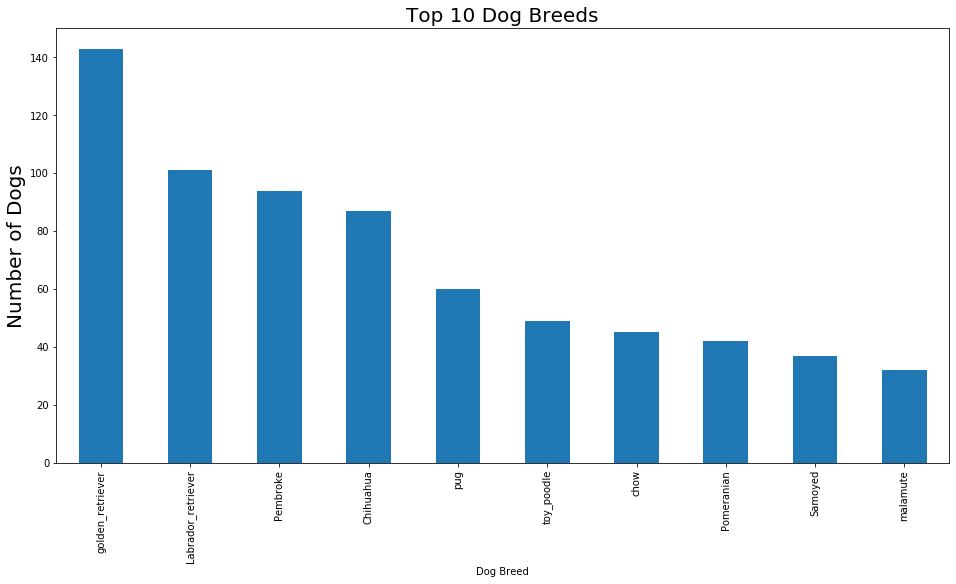

In [926]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 8))
df['dog_list'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs', size=20)
plt.title('Top 10 Dog Breeds', size=20)
plt.xlabel('Dog Breed',size=10)
plt.savefig('most_popular_breeds',size=10);

2. The most common dog names are **Lucy**(female) and **Cooper**(male)

In [927]:
df['name'].value_counts()

Cooper     10
Lucy        9
Oliver      9
Charlie     9
Tucker      8
           ..
Jarvis      1
Brutus      1
Ralphie     1
Lassie      1
Andru       1
Name: name, Length: 809, dtype: int64

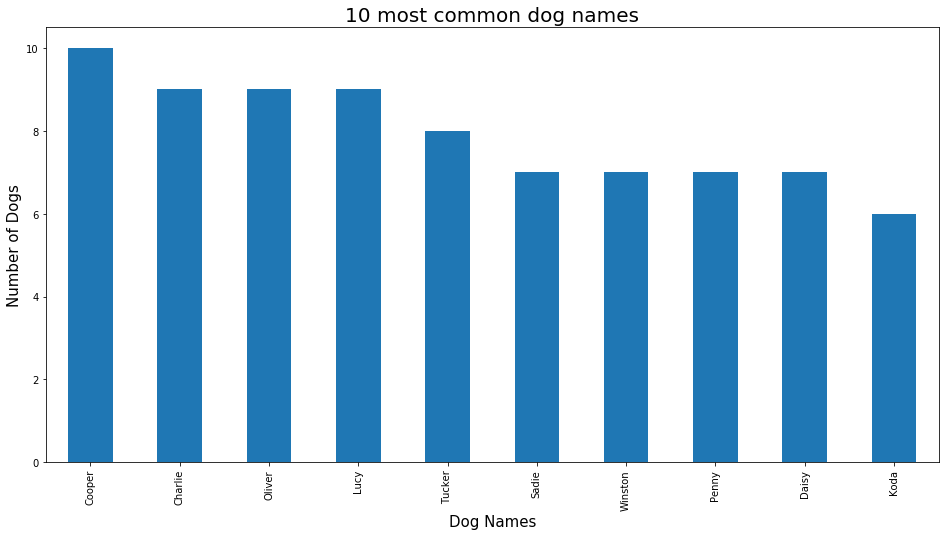

In [928]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 8))
df['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs',size=15)
plt.title('10 most common dog names', size=20)
plt.xlabel('Dog Names',size=15)
plt.savefig('most_frequent_names');


3. The most common dog stage is **pupper**

In [929]:
df['dog_stage'].value_counts()

pupper     171
doggo       51
puppo       21
floofer      8
Name: dog_stage, dtype: int64

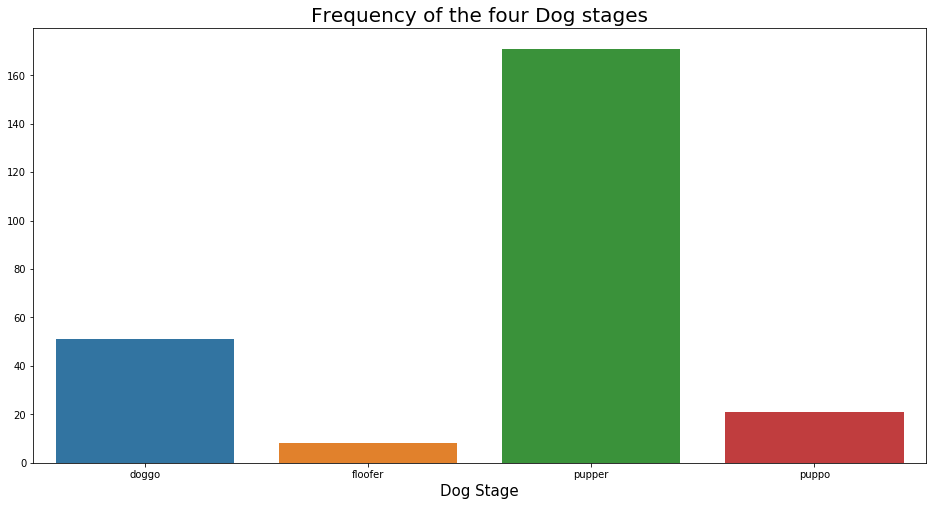

In [930]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 8))
sns.countplot(data=df, x='dog_stage')
plt.title('Frequency of the four Dog stages', size=20)
plt.xlabel('Dog Stage',size=15)
plt.ylabel(None)
plt.savefig('dog_stages');

4. The **iPhone** is the device used most for tweeting.

In [931]:
df.source.value_counts()

Twitter for iPhone    1592
Twitter Web Client      20
TweetDeck                8
Name: source, dtype: int64

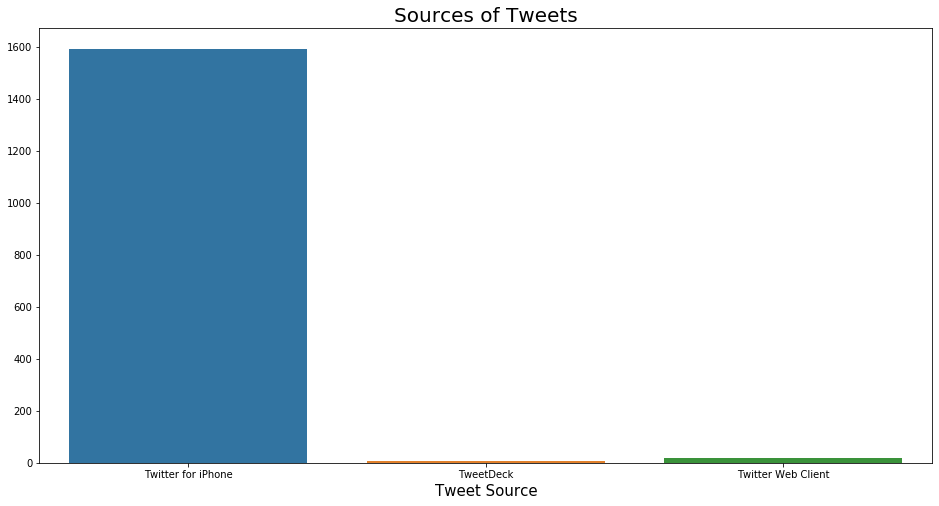

In [932]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 8))
sns.countplot(data=df, x='source')
plt.title('Sources of Tweets', size=20)
plt.xlabel('Tweet Source',size=15)
plt.ylabel(None)
plt.savefig('tweet_source');

## Conclusion <a name="conclusion"></a>
We have now come to the end of our wrangling project.

Thanks to **Twitter** for providing the data source.

Thanks to all the dog lovers as well.

### References

* https://en.wikipedia.org/wiki/WeRateDogs
* https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe
* https://stackoverflow.com/questions/42574379/python-sorting-dates-after-counting-them-in-pandas
* https://stackoverflow.com/questions/35919907/replace-some-specific-values-in-pandas-column-based-on-conditions-in-other-colum
* https://stackoverflow.com/questions/35919907/replace-some-specific-values-in-pandas-column-based-on-conditions-in-other-colum
* https://github.com/kdow/WeRateDogs/blob/master/wrangle_act.ipynb
* https://github.com/sanjeevai/Wrangle_and_Analyze_data/blob/master/wrangle_act.ipynb